In [1]:
import networkx as nx
import numpy as np
from random import random
import pandas as pd
from scipy.stats import bernoulli

In [2]:
G = nx.planted_partition_graph(3, 5, 0.7, 0.05, seed=40)

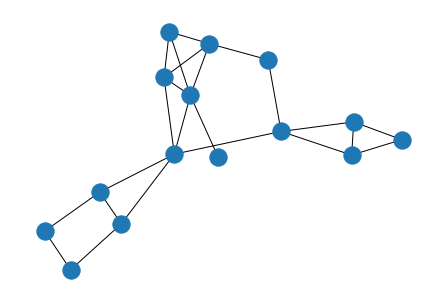

In [3]:
pos = nx.spring_layout(G)
nx.draw(G, pos = pos)

In [4]:
# bigclam algorithm taken from https://github.com/RobRomijnders/bigclam
def sigm(x):
    return np.divide(np.exp(-1.*x),1.-np.exp(-1.*x))

def log_likelihood(F, A):
    """implements equation 2 of 
    https://cs.stanford.edu/people/jure/pubs/bigclam-wsdm13.pdf"""
    A_soft = F.dot(F.T)

    # Next two lines are multiplied with the adjacency matrix, A
    # A is a {0,1} matrix, so we zero out all elements not contributing to the sum
    FIRST_PART = A*np.log(1.-np.exp(-1.*A_soft))
    sum_edges = np.sum(FIRST_PART)
    SECOND_PART = (1-A)*A_soft
    sum_nedges = np.sum(SECOND_PART)

    log_likeli = sum_edges - sum_nedges
    return log_likeli

def gradient(F, A, i):
    """Implements equation 3 of
    https://cs.stanford.edu/people/jure/pubs/bigclam-wsdm13.pdf
    
      * i indicates the row under consideration
    
    The many forloops in this function can be optimized, but for
    educational purposes we write them out clearly
    """
    N, C = F.shape

    neighbours = np.where(A[i])
    nneighbours = np.where(1-A[i])

    sum_neigh = np.zeros((C,))
    for nb in neighbours[0]:
        dotproduct = F[nb].dot(F[i])
        sum_neigh += F[nb]*sigm(dotproduct)

    sum_nneigh = np.zeros((C,))
    #Speed up this computation using eq.4
    for nnb in nneighbours[0]:
        sum_nneigh += F[nnb]

    grad = sum_neigh - sum_nneigh
    return grad

def train(A, Att, C, iterations = 100):
    # initialize an F
    N = A.shape[0]
    F = np.random.rand(N,C)
    W = np.random.rand(Att.shape[1], C)
    F_new = np.zeros((N,C))
    for n in range(iterations):
        for person in range(N):
            grad = gradient(F, A, person)

            F_new[person] += 0.005*grad
            
        Q = np.divide(1, 1 + np.exp(-F.dot(W.T)))
        X = bernoulli.rvs(Q)
        F_new += 0.005*(X-Q).dot(W)
        F = np.maximum(.001, F_new)
    
    return F

In [12]:
# without node attributes no longer works
#likelihood = []
#preference_matrix = []
#for i in range(100):
    #F, ll = train(A, 3)
    #likelihood.append(ll)
    #preference_matrix.append(F)
#best = np.argmax(likelihood)
#pred = np.argmax(preference_matrix[best], 1)

In [ ]:
attr_mat = np.array([np.random.rand(3) for node in G.nodes()])

In [5]:
A = nx.to_numpy_array(G)

In [6]:
F = np.random.rand(A.shape[0], 3)

In [9]:
W = np.random.rand(attr_mat.shape[1], 3)

In [11]:
A

array([[0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.

In [42]:
F

array([[0.18583743, 0.72704353, 0.87902276],
       [0.21614431, 0.61681739, 0.65503186],
       [0.12418491, 0.98425649, 0.02351312],
       [0.27080544, 0.50360124, 0.39985631],
       [0.24645156, 0.67854964, 0.92424801],
       [0.45407945, 0.50023708, 0.8327005 ],
       [0.88711803, 0.65058863, 0.41539647],
       [0.50443369, 0.51977115, 0.74766564],
       [0.21964998, 0.93135168, 0.41076973],
       [0.47035485, 0.586586  , 0.86760251],
       [0.79351125, 0.13391136, 0.00386438],
       [0.24769012, 0.97071998, 0.17337064],
       [0.1754222 , 0.88053531, 0.36758522],
       [0.66579944, 0.5893341 , 0.60561528],
       [0.62944185, 0.8696942 , 0.41088623]])

In [18]:
for i in F.shape[0]:
    F[i:].dot(W)

array([[0.07108923, 0.84671457, 0.09820188],
       [0.52815388, 0.14777508, 0.09211004],
       [0.45059146, 0.62791842, 0.62167494]])

In [55]:
Q = np.divide(1, 1 + np.exp(-F.dot(W.T)))
Q

array([[0.67153395, 0.5711529 , 0.74776493],
       [0.6461044 , 0.56602288, 0.70928637],
       [0.69941665, 0.55309979, 0.66565697],
       [0.61891005, 0.56322904, 0.66525999],
       [0.66436798, 0.57824415, 0.75244677],
       [0.63125649, 0.59639018, 0.7381512 ],
       [0.65807334, 0.64632814, 0.74392807],
       [0.63399168, 0.6015902 , 0.73467493],
       [0.69942098, 0.57235734, 0.71892804],
       [0.64915074, 0.60229035, 0.7539206 ],
       [0.5424412 , 0.6080781 , 0.60922059],
       [0.70194064, 0.57205388, 0.69612656],
       [0.68871749, 0.56380754, 0.70275813],
       [0.64698247, 0.62116987, 0.74011246],
       [0.69455022, 0.62217917, 0.74746843]])

In [56]:
X = bernoulli.rvs(Q)
X

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 1],
       [0, 1, 1],
       [0, 0, 1],
       [1, 1, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 1]], dtype=int64)

In [85]:
(X-Q).dot(W)

array([[-0.15817806, -0.97476004, -0.4913115 ],
       [-0.13632275, -0.92830899, -0.46442059],
       [-0.12010145,  0.38271408,  0.18642449],
       [ 0.40860466,  0.5974077 ,  0.28575422],
       [ 0.35815718,  0.50195276,  0.22570529],
       [ 0.28627939, -0.3104309 ,  0.13797078],
       [ 0.25539506, -0.34414412,  0.12714619],
       [ 0.35599414,  0.53538211,  0.2375862 ],
       [ 0.30278846, -0.35252474,  0.14544112],
       [-0.25336833, -0.4841311 ,  0.03375659],
       [ 0.41560444,  0.69071558,  0.32397085],
       [-0.59461235, -0.2692748 , -0.45618636],
       [-0.21280289, -0.4798202 ,  0.06522213],
       [-0.25696365, -0.47641474,  0.04081469],
       [ 0.26396107, -0.37368406,  0.1235875 ]])

In [69]:
W

array([[0.07108923, 0.84671457, 0.09820188],
       [0.52815388, 0.14777508, 0.09211004],
       [0.45059146, 0.62791842, 0.62167494]])

In [91]:
train(A, attr_mat, 3)

array([[1.52322516e-01, 5.53653203e-01, 6.35171456e-01],
       [1.25132828e+00, 1.80272962e+00, 1.80403905e+00],
       [1.00000000e-03, 7.90904682e-02, 7.09035714e-02],
       [2.37429280e+00, 2.95290750e+00, 2.94743931e+00],
       [1.00000000e-03, 2.60679027e-01, 2.76621579e-01],
       [5.00918714e-01, 1.00000000e-03, 1.00000000e-03],
       [2.23132048e-01, 1.00000000e-03, 1.00000000e-03],
       [1.60894531e-01, 1.00000000e-03, 7.72289485e-02],
       [3.33461604e-01, 1.00000000e-03, 1.00000000e-03],
       [3.23654515e-01, 1.00000000e-03, 1.00000000e-03],
       [3.83723913e-01, 1.00000000e-03, 1.00000000e-03],
       [2.23639396e-01, 1.00000000e-03, 1.00000000e-03],
       [2.11531741e-01, 1.00000000e-03, 1.00000000e-03],
       [2.61534807e+00, 2.66634723e+00, 2.64473873e+00],
       [3.88484167e-01, 1.00000000e-03, 1.00000000e-03]])

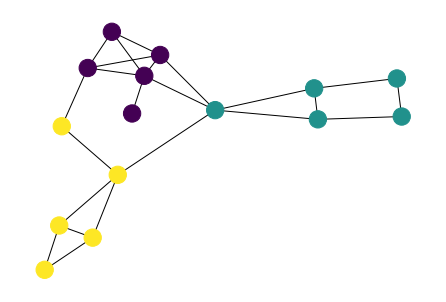

In [155]:
pos = nx.spring_layout(G)
nx.draw(G, pos = pos, node_color=pred)

In [178]:
def bigclam(A, X, K, alpha):
    """
    BigCLAM algorithm for community detection with node features and prior.
    A: adjacency matrix of the graph
    X: node feature matrix
    K: number of communities
    alpha: parameter for the prior probability
    """
    N = A.shape[0] # number of nodes
    F = X.shape[1] # number of features

    # initialize community assignments and feature matrices
    c = np.random.randint(0, K, N)
    mu = np.random.rand(K, F)
    sigma = np.random.rand(K, F)
    count = 0
    max_iter = 100
    # E-step
    while True:
        # compute the prior probability
        prior = np.zeros((N, K))
        for k in range(K):
            mask = (c == k)
            prior[:, k] = np.sum(A[:, mask], axis=1) * alpha
        # compute the likelihood
        likelihood = np.zeros((N, K))
        for k in range(K):
            likelihood[:, k] = multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
        # compute the total probability
        probability = likelihood * prior
        probability /= np.sum(probability, axis=1, keepdims=True)

        # check for convergence
        new_c = np.argmax(probability, axis=1)
        if np.array_equal(new_c, c):
            break
        c = new_c
        if count == max_iter:
            break
        count +=1
    return c

In [8]:
attr_mat = np.array([np.random.rand(3) for node in G.nodes()])

In [176]:
pred = bigclam(A, attr_mat, 3, .05)

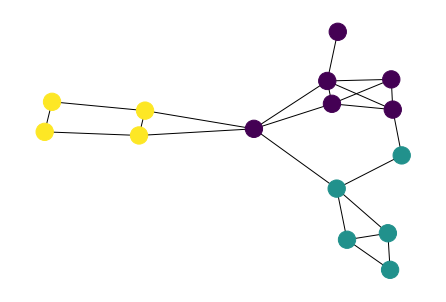

In [177]:
pos = nx.spring_layout(G)
nx.draw(G, pos = pos, node_color=pred)